In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# stat models for performing linear regression
import statsmodels.api as sm


In [3]:
# We will use this class to generate the data
class DataGenerator:
    ## n_x: the dimensions of x
    ## n_y: the dimensions of y
    def __init__(self, n_x: int, n_y: int):
        self.n_x = n_x
        self.n_y = n_y
    ## n_data: the amount of data to generate 
    def generate(self, n_data):
        pass

In [4]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.Beta = np.random.normal(size = [n_x + 1,  n_y])
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = np.append(X[t, :], 1)
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

In [5]:
# Initialise the generator for one-dimensional X and Y
generator = LinearModelGenerator(1, 1)


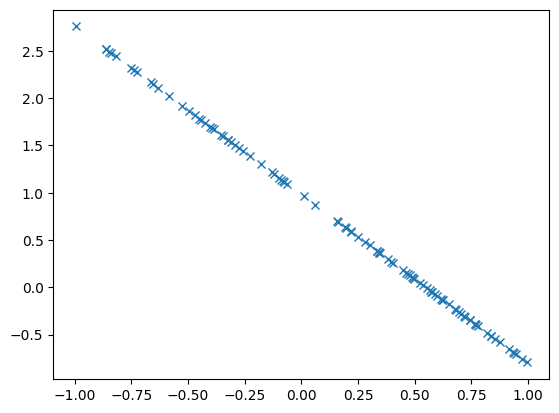

In [6]:
generator.sigma = 0.0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

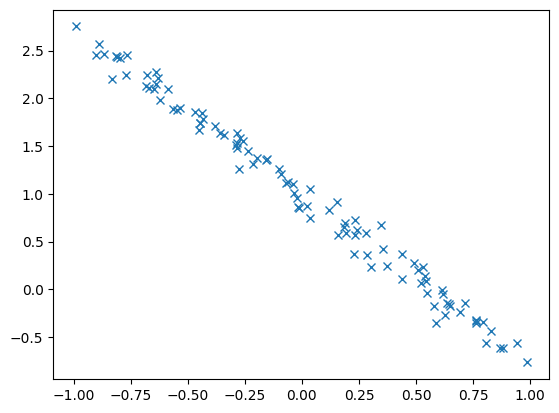

In [7]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

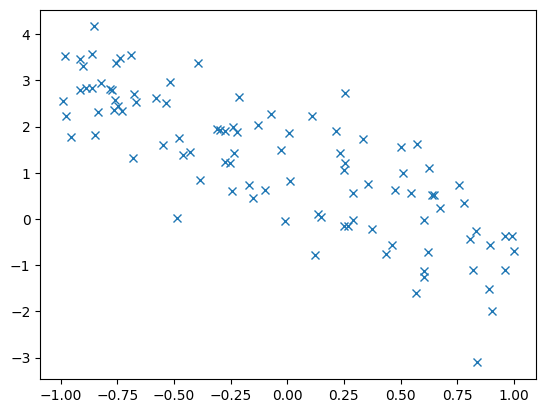

In [8]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

In [9]:
# This class generates data from a simple non-linear model
class KernelModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int, n_centers: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.C = np.random.normal(size = [n_centers, n_x])
        self.Z = np.random.normal(size = [n_centers, n_y])
        self.n_centers = n_centers
        self.sigma = 1
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = X[t, :]
            D = np.array([np.linalg.norm(x - self.C[c]) for c in range(self.n_centers)])
            Y[t, :] =  np.dot(np.exp(-D), self.Z) + self.sigma * np.random.normal(size=self.n_y) 
        return X, Y

In [10]:

generator = KernelModelGenerator(1, 1, 10)

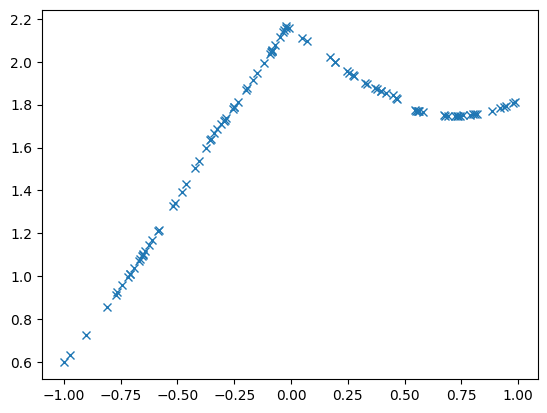

In [11]:
generator.sigma = 0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

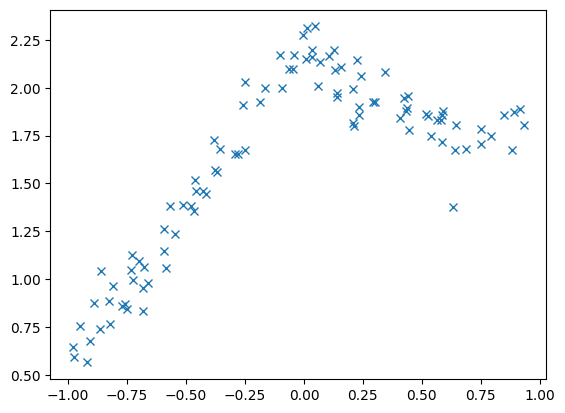

In [12]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

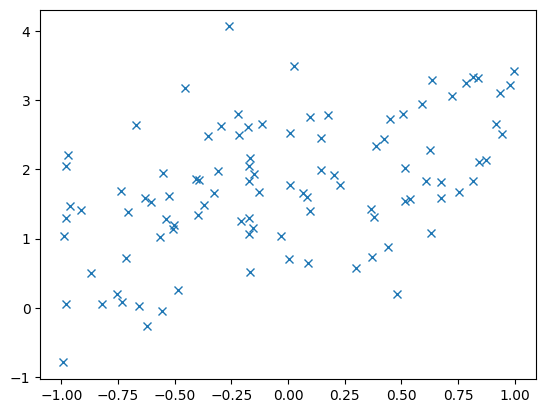

In [13]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')